In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

movies = pd.read_csv('tmdb_5000_movies.csv')

movies = movies[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count', 'popularity', 'genres']]
movies.dropna(inplace=True)

genres = movies['genres'].str.get_dummies(sep='|')
movies = pd.concat([movies, genres], axis=1)
movies.drop(['genres'], axis=1, inplace=True)

X = movies.drop(['vote_average'], axis=1)
y = movies['vote_average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R^2:', r2)


RMSE: 1.0283561334230487
R^2: 0.248610769381588


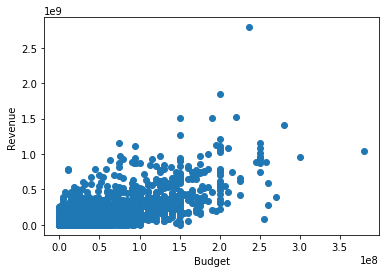

In [11]:
import matplotlib.pyplot as plt

plt.scatter(movies['budget'], movies['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


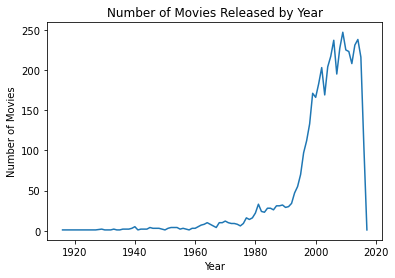

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe
df = pd.read_csv('tmdb_5000_movies.csv')

# Extract the year from the release date and create a new column
df['release_year'] = pd.DatetimeIndex(df['release_date']).year

# Group the movies by release year and count the number of movies released in each year
movies_by_year = df.groupby('release_year').size()

# Create a line plot of the number of movies released over time
plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()
